In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('talk')

import warnings
warnings.filterwarnings('ignore')

import patsy
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import ttest_ind, chisquare, normaltest

In [2]:
df = pd.read_csv("datasets/merged/merged_X.csv")

In [3]:
df.corr()

,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg
latitude,1.000000,-0.126899,0.286384,0.340632,0.212938,-0.936889,-0.214052,-0.070578,-0.094666,-0.060936,-0.082944,-0.036453,-0.020769
longitude,-0.126899,1.000000,-0.432626,-0.115935,0.179469,0.119875,0.598836,0.031162,-0.027195,0.041480,0.015237,0.013413,0.067130
altitude_ft,0.286384,-0.432626,1.000000,0.077227,0.036987,-0.508475,-0.572240,-0.082903,-0.083294,-0.137023,-0.130920,-0.042480,-0.195552
city_id,0.340632,-0.115935,0.077227,1.000000,-0.222917,-0.297402,-0.084842,-0.036452,-0.068302,-0.067437,-0.060003,-0.051803,-0.149030
fips,0.212938,0.179469,0.036987,-0.222917,1.000000,-0.182941,0.038748,-0.033904,-0.064327,0.001051,-0.109246,0.009403,0.083716
temp_avg,-0.936889,0.119875,-0.508475,-0.297402,-0.182941,1.000000,0.270810,0.126149,0.153333,0.116589,0.145536,0.093256,0.084941
pcp_avg,-0.214052,0.598836,-0.572240,-0.084842,0.038748,0.270810,1.000000,0.027916,0.004831,0.047475,0.040609,-0.040714,0.333767
strike_avg,-0.070578,0.031162,-0.082903,-0.036452,-0.033904,0.126149,0.027916,1.000000,0.880984,0.240841,0.442874,0.523452,0.165821
damage_avg,-0.094666,-0.027195,-0.083294,-0.068302,-0.064327,0.153333,0.004831,0.880984,1.000000,0.186027,0.389105,0.405481,0.155837
city_population,-0.060936,0.041480,-0.137023,-0.067437,0.001051,0.116589,0.047475,0.240841,0.186027,1.000000,0.615097,0.418047,0.173813


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000244D0EABC08>,
      dtype=object)

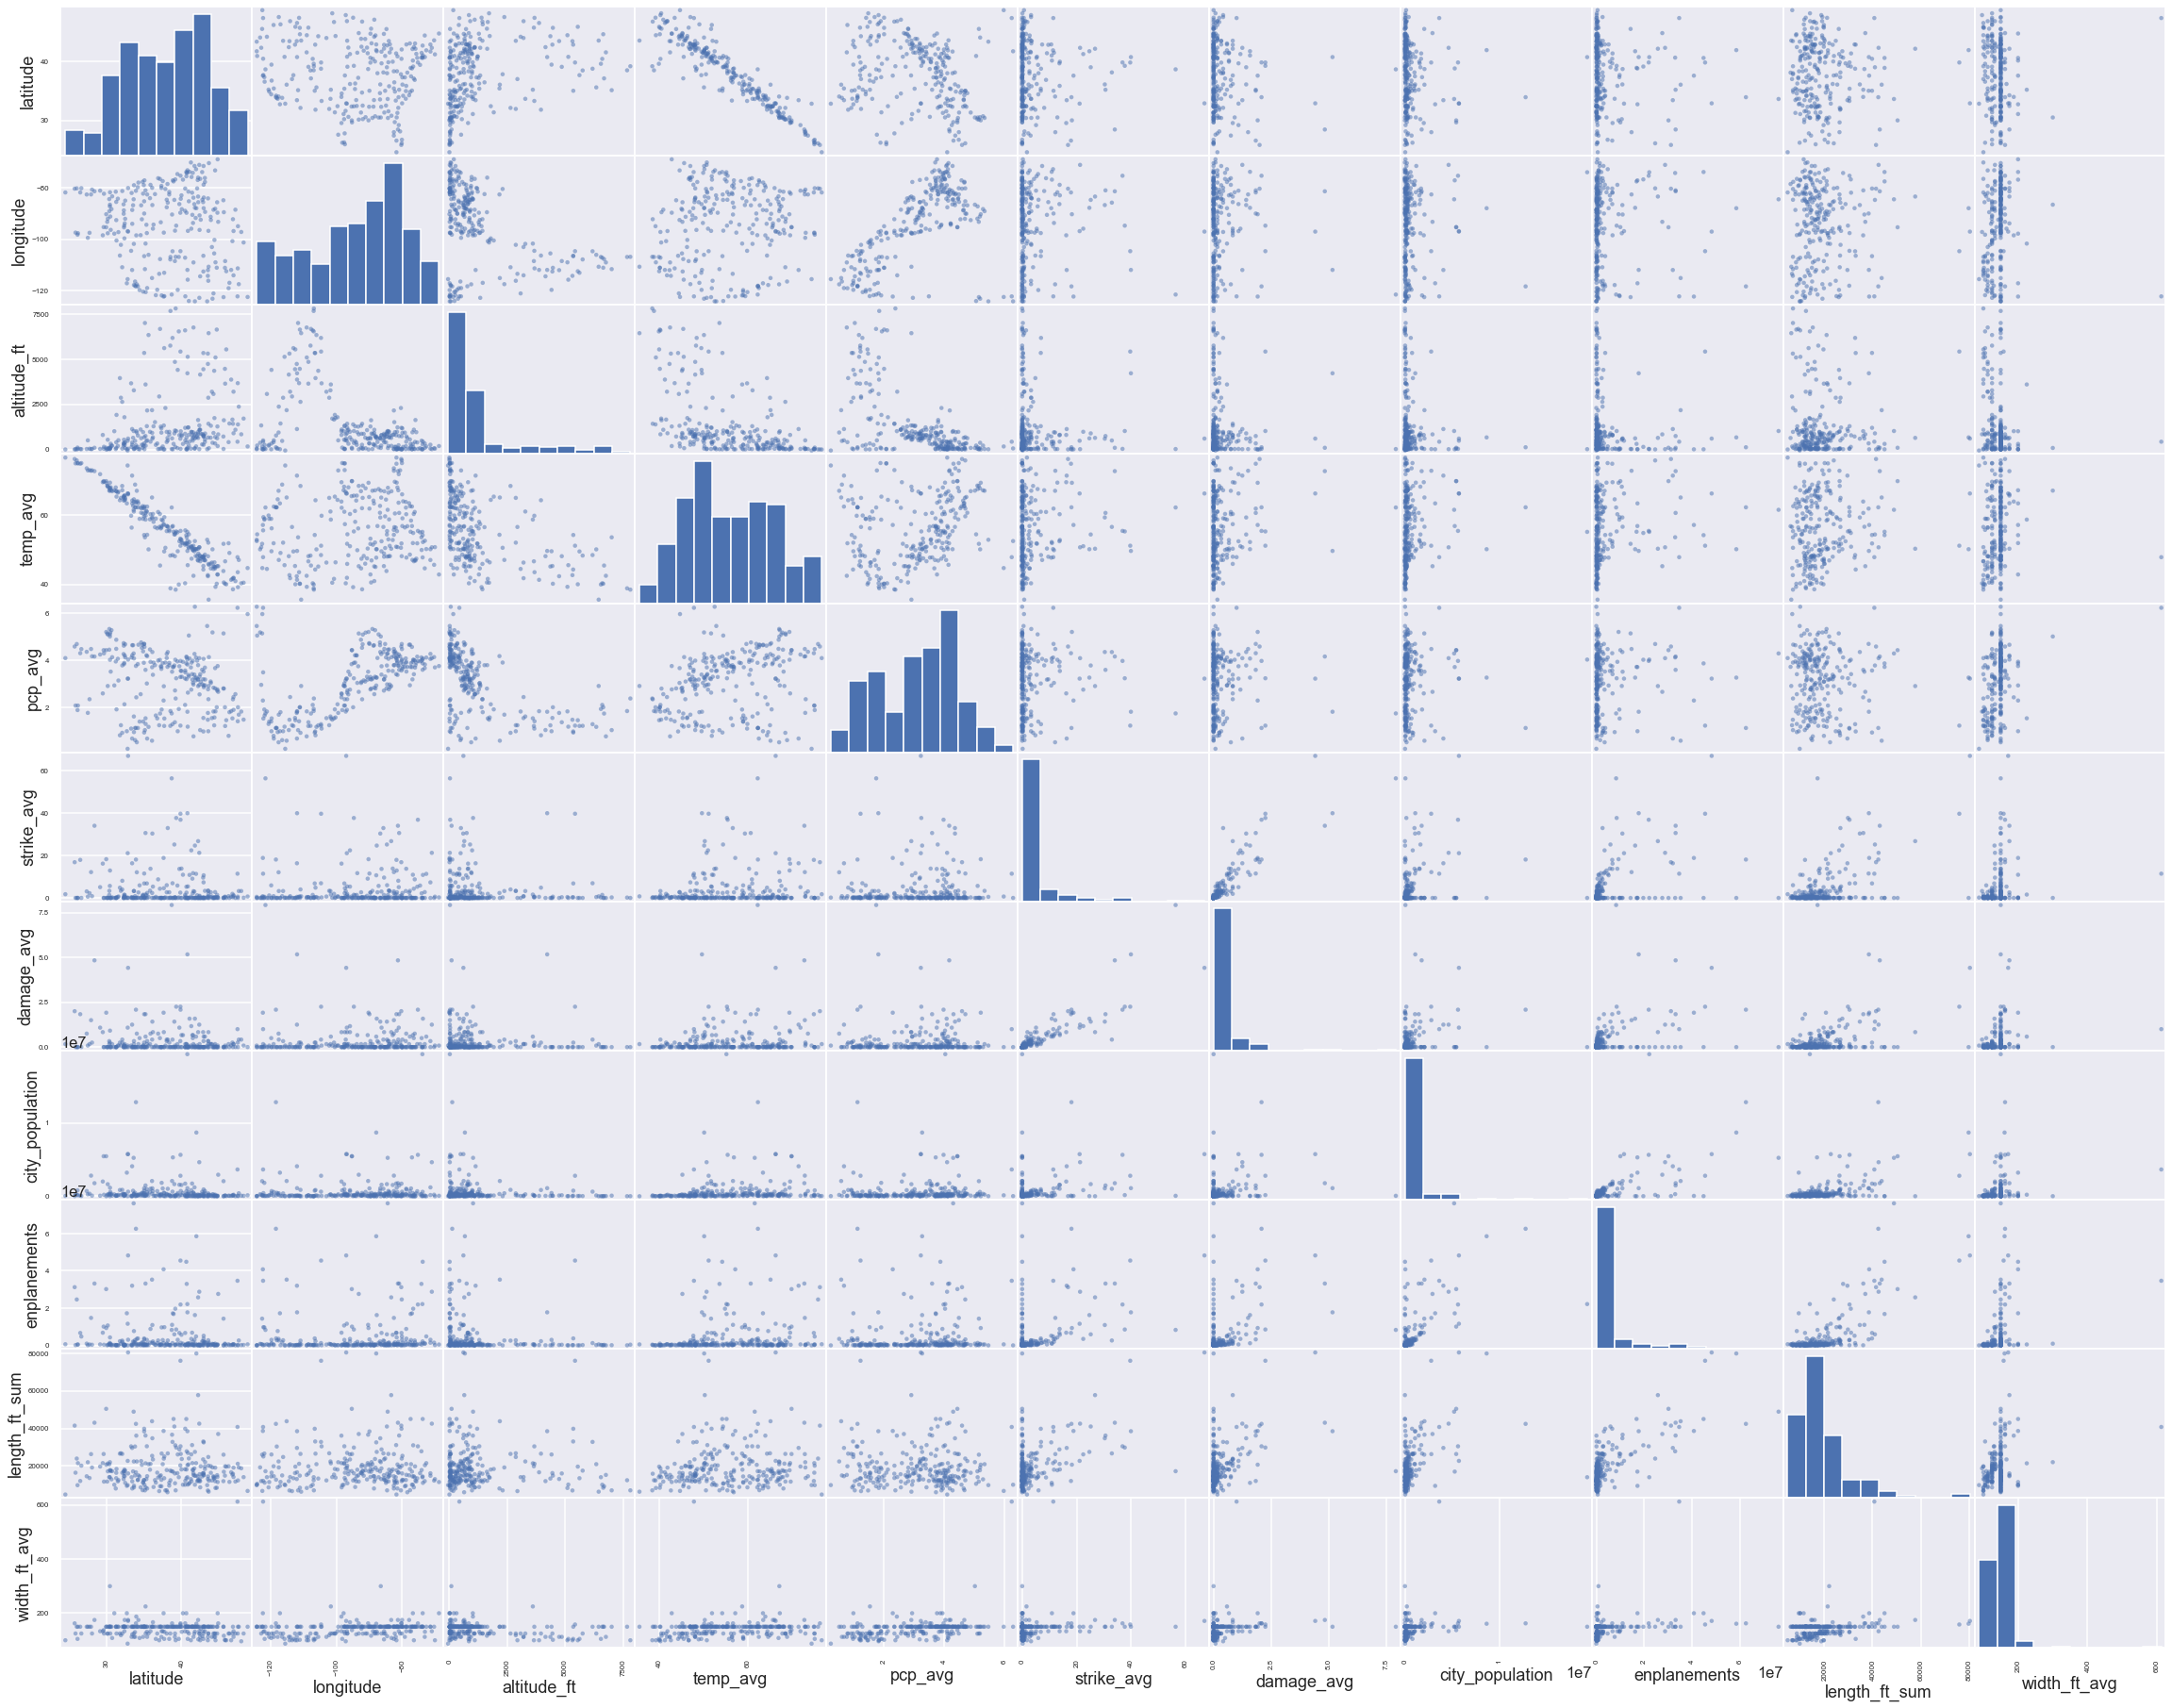

In [4]:
pd.plotting.scatter_matrix(df.loc[:,['latitude','longitude','altitude_ft','temp_avg','pcp_avg','strike_avg','damage_avg','city_population','enplanements','length_ft_sum','width_ft_avg']],figsize = (40,32))

In [5]:
df

,Unnamed: 0,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg
0,ABE,allentown,KABE,40.652100,-75.440804,393.0,10988,42077,51.902490,4.161037,5.250000,0.166667,682899.0,517148.0,13397.0,150.000000
1,ABI,abilene,KABI,32.411301,-99.681900,1791.0,5333,48441,64.488797,2.131411,0.750000,0.083333,114964.0,123699.5,18078.0,133.333333
2,ABQ,albuquerque,KABQ,35.040199,-106.609001,5355.0,3742,35001,54.316598,0.928465,6.833333,0.250000,758523.0,3735962.5,39793.0,150.000000
3,ABY,albany,KABY,31.535500,-84.194504,197.0,17309,13095,66.578008,4.069336,0.416667,0.083333,90515.0,57631.0,11801.0,150.000000
4,ACK,nantucket,KACK,41.253101,-70.060204,47.0,19193,25019,50.793361,3.703195,0.583333,0.083333,201.0,176314.0,12999.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TYS,knoxville,KTYS,35.811001,-83.994003,981.0,8569,47093,58.838589,4.469751,3.416667,0.166667,585249.0,1498534.5,18005.0,150.000000
249,VLD,valdosta,KVLD,30.782499,-83.276703,203.0,17227,13185,66.983817,4.138382,0.250000,0.166667,79294.0,66042.5,17236.0,108.333333
250,VPS,valparaiso,KVPS,30.483200,-86.525398,87.0,2510,12091,67.168050,5.020456,0.000000,0.000000,4946.0,909512.5,22017.0,300.000000
251,WYS,yellowstone,KWYS,44.688400,-111.117996,6649.0,26356,30031,40.186307,2.004440,0.000000,0.000000,1365.0,12886.0,8399.0,150.000000


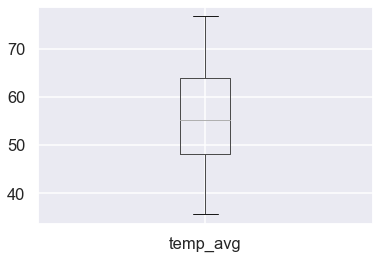

In [6]:
df.boxplot(column = ['temp_avg'])

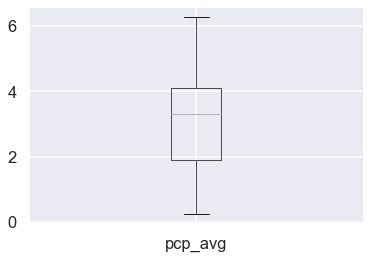

In [7]:
df.boxplot(column = ['pcp_avg'])

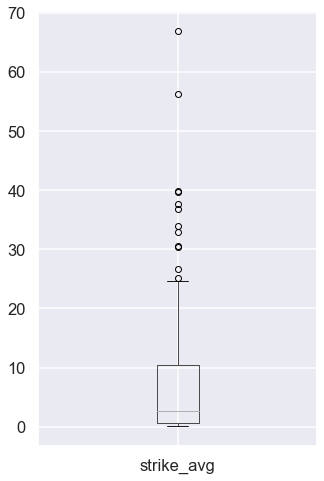

In [8]:
df_strike_not0 = df[df['strike_avg'] != 0]
df_strike_not0.boxplot(column = ['strike_avg'],figsize = (5,8))

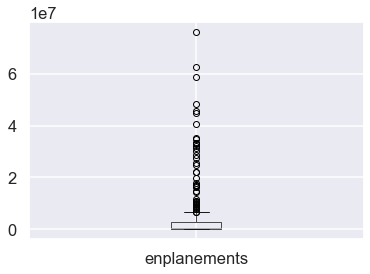

In [9]:
df_enplanements_not0 = df[df['enplanements'] != 0]
df_enplanements_not0.boxplot(column = ['enplanements'])

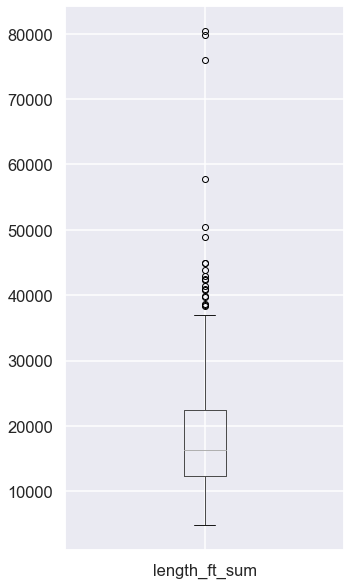

In [10]:
df.boxplot(column = ['length_ft_sum'],figsize = [5,10])

In [13]:
security = pd.read_excel("datasets/original/airport/security_wait_times.xls")

In [14]:
list = []
>>> for i in range(759):
>>>    list.append(0.0)
security['avg'] = list
security.columns

Index(['Code', 'Airport', 'Checkpoint', '2015 December', '2014 December',
       '2013 December', '2012 December', '2011 December', '2010 December',
       '2009 December',
       ...
       '2014 January', '2013 January', '2012 January', '2011 January',
       '2010 January', '2009 January', '2008 January', '2007 January',
       '2006 January', 'avg'],
      dtype='object', length=129)

In [15]:
def calculate_avg(df):
    for index,row in df.iterrows():
        row_sub = row[3:128]
        time = 0
        sums = 0
        for i in row_sub:
            if i>0:
                time = time + 1
                sums = sums + i
        df.at[index,'avg'] = sums/time
    return df

In [16]:
security = calculate_avg(security)

In [17]:
df.columns

Index(['Unnamed: 0', 'city_name', 'code4', 'latitude', 'longitude',
       'altitude_ft', 'city_id', 'fips', 'temp_avg', 'pcp_avg', 'strike_avg',
       'damage_avg', 'city_population', 'enplanements', 'length_ft_sum',
       'width_ft_avg'],
      dtype='object')

In [18]:
security_sub = security.loc[:,['Code','Airport','avg']]

In [19]:
security_sum = security_sub.groupby('Code').sum()


In [20]:
df = df.rename(columns = {'Unnamed: 0':'Code'})
df

,Code,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg
0,ABE,allentown,KABE,40.652100,-75.440804,393.0,10988,42077,51.902490,4.161037,5.250000,0.166667,682899.0,517148.0,13397.0,150.000000
1,ABI,abilene,KABI,32.411301,-99.681900,1791.0,5333,48441,64.488797,2.131411,0.750000,0.083333,114964.0,123699.5,18078.0,133.333333
2,ABQ,albuquerque,KABQ,35.040199,-106.609001,5355.0,3742,35001,54.316598,0.928465,6.833333,0.250000,758523.0,3735962.5,39793.0,150.000000
3,ABY,albany,KABY,31.535500,-84.194504,197.0,17309,13095,66.578008,4.069336,0.416667,0.083333,90515.0,57631.0,11801.0,150.000000
4,ACK,nantucket,KACK,41.253101,-70.060204,47.0,19193,25019,50.793361,3.703195,0.583333,0.083333,201.0,176314.0,12999.0,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TYS,knoxville,KTYS,35.811001,-83.994003,981.0,8569,47093,58.838589,4.469751,3.416667,0.166667,585249.0,1498534.5,18005.0,150.000000
249,VLD,valdosta,KVLD,30.782499,-83.276703,203.0,17227,13185,66.983817,4.138382,0.250000,0.166667,79294.0,66042.5,17236.0,108.333333
250,VPS,valparaiso,KVPS,30.483200,-86.525398,87.0,2510,12091,67.168050,5.020456,0.000000,0.000000,4946.0,909512.5,22017.0,300.000000
251,WYS,yellowstone,KWYS,44.688400,-111.117996,6649.0,26356,30031,40.186307,2.004440,0.000000,0.000000,1365.0,12886.0,8399.0,150.000000


In [21]:
df = df.merge(security_sum, how = 'left', on = 'Code')

In [22]:
df

,Code,city_name,code4,latitude,longitude,altitude_ft,city_id,fips,temp_avg,pcp_avg,strike_avg,damage_avg,city_population,enplanements,length_ft_sum,width_ft_avg,avg
0,ABE,allentown,KABE,40.652100,-75.440804,393.0,10988,42077,51.902490,4.161037,5.250000,0.166667,682899.0,517148.0,13397.0,150.000000,2.450000
1,ABI,abilene,KABI,32.411301,-99.681900,1791.0,5333,48441,64.488797,2.131411,0.750000,0.083333,114964.0,123699.5,18078.0,133.333333,1.416667
2,ABQ,albuquerque,KABQ,35.040199,-106.609001,5355.0,3742,35001,54.316598,0.928465,6.833333,0.250000,758523.0,3735962.5,39793.0,150.000000,2.974359
3,ABY,albany,KABY,31.535500,-84.194504,197.0,17309,13095,66.578008,4.069336,0.416667,0.083333,90515.0,57631.0,11801.0,150.000000,1.583333
4,ACK,nantucket,KACK,41.253101,-70.060204,47.0,19193,25019,50.793361,3.703195,0.583333,0.083333,201.0,176314.0,12999.0,100.000000,1.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,TYS,knoxville,KTYS,35.811001,-83.994003,981.0,8569,47093,58.838589,4.469751,3.416667,0.166667,585249.0,1498534.5,18005.0,150.000000,2.588235
249,VLD,valdosta,KVLD,30.782499,-83.276703,203.0,17227,13185,66.983817,4.138382,0.250000,0.166667,79294.0,66042.5,17236.0,108.333333,1.000000
250,VPS,valparaiso,KVPS,30.483200,-86.525398,87.0,2510,12091,67.168050,5.020456,0.000000,0.000000,4946.0,909512.5,22017.0,300.000000,3.033333
251,WYS,yellowstone,KWYS,44.688400,-111.117996,6649.0,26356,30031,40.186307,2.004440,0.000000,0.000000,1365.0,12886.0,8399.0,150.000000,3.428571


In [23]:
df.to_csv('merge_with_security_time')